In [2]:
import numpy as np 
import pandas as pd 
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output

sales = pd.read_csv('store.csv') 


In [3]:
sales[:5]

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


In [4]:
sales.shape

(10000, 5)

In [5]:
sales.describe()

,qty,revenue
count,10000.000000,10000.000000
mean,3.387400,90.570221
std,4.318308,127.803928
min,1.000000,18.430000
25%,2.000000,39.300000
50%,2.000000,58.425000
75%,3.000000,75.000000
max,25.000000,1998.750000


In [6]:
sales['reps'].unique() 

array(['Chitra', 'Vijay', 'Mala', 'Suman', 'Rachna', 'Aash', 'Chand',
       'Suraj', 'Bala', 'Seet', 'Ravi', 'Anusha', 'Ananya', 'Jaggi',
       'Reva', 'Meena', 'Sai', 'Rahul', 'Ram', 'Prarth', 'Pooja', 'Rishi',
       'Ranga', 'Sesh', 'Shaanth', 'Bharath', 'Susan', 'Ratna', 'Easwar',
       'Prasad', 'Madhu', 'Suresh', 'Anahit', 'Sumedh', 'Manju',
       'Nandini', 'Santosh', 'Satyen', 'Vaghya', 'Palak', 'Aparna',
       'Jagdish', 'Vish', 'Kumar', 'John', 'Bhat', 'Hussain', 'Alka',
       'Rohini', 'Keshab', 'Nidhi', 'Satya', 'Venkat', 'Veeyes', 'Rajat',
       'Chandra', 'Kamat', 'Raji', 'Swami', 'Jay', 'Mukund', 'Priya',
       'Kishen', 'Vidya', 'Akila', 'Durga', 'Mak', 'Mehta', 'Javed',
       'Sruti', 'Mukesh', 'Kishore'], dtype=object)

In [7]:
print(sales.revenue.max())
print(sales.revenue.min())

1998.75
18.43


In [8]:
pd.value_counts(sales.reps, sort=True)

Seet       353
Santosh    318
Rachna     318
Aash       315
Vish       308
Sai        292
Jagdish    292
Nandini    286
Shaanth    283
Ravi       276
Ananya     216
Suresh     207
Hussain    206
Vaghya     205
Mala       194
Easwar     180
Suman      173
Bharath    171
Sumedh     125
Alka       116
Satya      115
Mukund     115
Palak      115
Mehta      114
Raji       113
Ranga      113
Satyen     112
Priya      111
Vijay      111
Swami      110
          ... 
Chandra    101
Keshab     101
Meena      100
Chand      100
Pooja      100
Vidya       99
Rajat       99
Mukesh      99
Durga       98
Bala        97
Prarth      97
Rishi       97
Ratna       96
Chitra      96
Manju       94
Kamat       94
Kumar       92
Javed       91
Reva        90
Jaggi       89
Veeyes      89
Kishore     88
Bhat        87
Prasad      86
Suraj       85
Ram         84
Jay         84
Anusha      82
Sesh        81
Rohini      79
Name: reps, Length: 72, dtype: int64

In [9]:
pd.pivot_table(sales,index=["region","reps","product"],aggfunc=np.sum)[:12]

qty  revenue
region reps product              
East   Aash Almond   102  2535.02
            Alpen    186  6217.75
            Beacon    48  1190.76
            Galaxy    30  2378.10
            Halls     17   319.11
            Jet      145  2861.58
            Mars     173  4012.66
            Milka    127  2876.64
            Orbit    103  2323.66
            Prince    82  2221.74
            Star      62  1288.15
            Trident   60  1773.30

In [10]:
total_rev = sales.groupby('region')['revenue'].apply(lambda x: x.sum())
total_rev.sort_values(ascending=False)

region
North    326109.54
West     274631.29
South    158819.85
East     146141.53
Name: revenue, dtype: float64

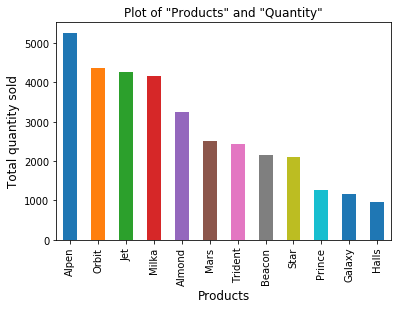

In [11]:
sales.groupby(['product']).qty.sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Total quantity sold', fontsize=12)
plt.title('Plot of "Products" and "Quantity"');

In [12]:
total_rev = sales.groupby('region')['revenue'].apply(lambda x: x.sum())
total_rev.sort_values(ascending=False)

region
North    326109.54
West     274631.29
South    158819.85
East     146141.53
Name: revenue, dtype: float64

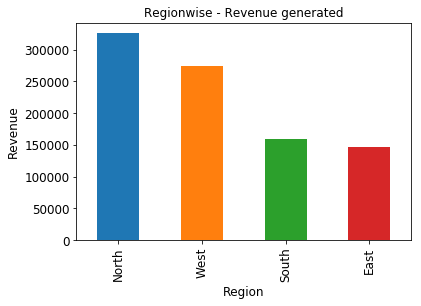

In [13]:
total_rev.sort_values(ascending=False).plot(kind='bar', fontsize=12)
plt.title('Regionwise - Revenue generated')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Revenue', fontsize=12);

In [14]:
from sklearn.preprocessing import LabelEncoder # encoding all the text categorical data into numerical data
le = LabelEncoder()

In [15]:
sales['region'] = le.fit_transform(sales['region'])
sales.head()

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,3
1,Vijay,Jet,2,39.30,1
2,Mala,Beacon,3,74.25,3
3,Suman,Alpen,3,100.98,1
4,Rachna,Orbit,2,44.98,1


In [17]:
cols = ['qty', 'revenue']
df = sales[cols]
X = df.iloc[:,[0,1]].values
X[:3]

array([[  2.  , 155.1 ],
       [  2.  ,  39.3 ],
       [  3.  ,  74.25]])

In [18]:
y = sales.iloc[:,4].values
y

array([3, 1, 3, ..., 3, 1, 3], dtype=int64)

In [24]:
from sklearn.cluster import KMeans

number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)

km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

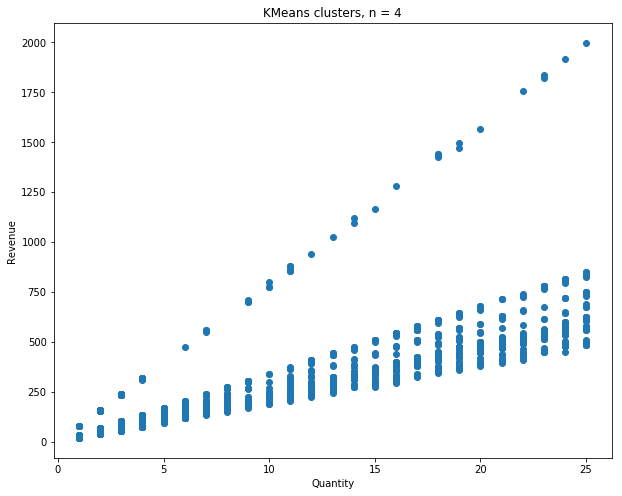

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('KMeans clusters, n = 4');

In [28]:
df[(df['qty']>12) & (df['revenue']>1000)]
cols1 = ['region', 'revenue']
df1 = sales[cols1]
X1 = df1.iloc[:,[0,1]].values
number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
km.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

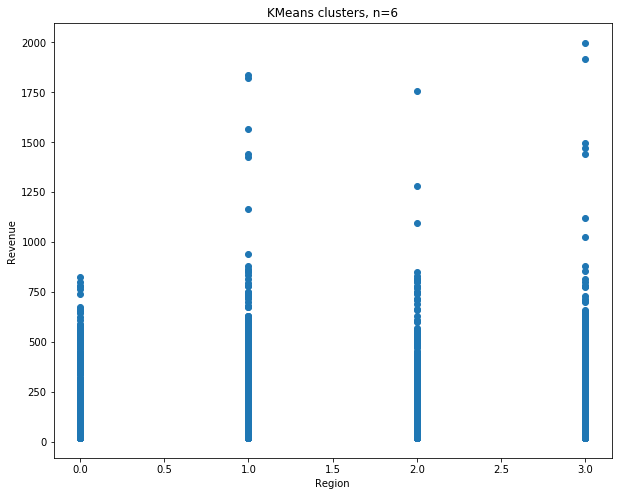

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(X1[:, 0], X1[:, 1],)
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('KMeans clusters, n=6');